## PRUEBA #1 (Regreciones)

#### AUTOR: CARLOS MOROCHO

#### ENUNCIADO
* Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real: <br>
  Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:<br>
    * Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
    * Generar un modelo probabilistico con los datos.
    * Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones 
        - Cual tiene una mejor prediccion
        - Ventajas y desventajas de los modelos.
        - Cual es el principal problema del modelo probabilistico
* El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
    * Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
    * El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
    * Deben calcularse las siguientes métricas:
    * Total de infectados dentro de 7 dias (matematico y probabilistico).

#### INVESTIGACION DE LOS DATOS
El pais que escogie para el desarrollo de la prueba fue <a href="https://es.wikipedia.org/wiki/Chile"> CHILE</a> un pais latinoamericano que como la mayoria tiene en sus paginas oficiales datos en tiempo "real" de los casos que se van reportando en ese pais, y una de las paginas oficiales que encontre fue la siguiente <a href="https://www.gob.cl/coronavirus/cifrasoficiales/"> pagina web</a>, esta pagina cuenta un sin numero de informacion tanto grafica como alfanumerico que podemos decargar sin ninguna restriccion.  

Como el enunciado nos pide los datos historicos de los casos sucitados dia a dia del pais escogido, nosotros nos descargamos el siguiente set.
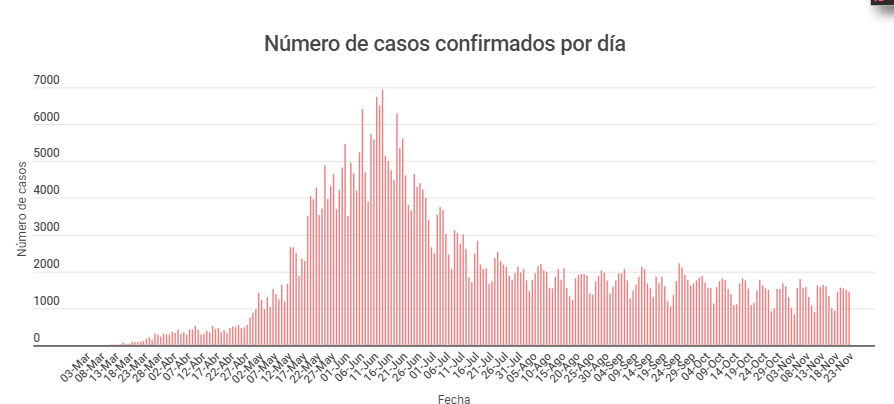

* Como podemos observar los datos de nuevos infectados estan al dia con la fecha de hoy y empezando desde el 30/2020.

#### PREPARACION DEL DATASET

In [1]:
# Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset
dataset = pd.read_csv('Data-Casos-COVID-Chile.csv')

# Agregamos un fila de total casos nuevos
def obtener_total_casos(valores):
    nuevos_casos = []
    for i, valor in enumerate(valores):
        if i > 0:
            nuevo_valor = nuevos_casos[i-1] + valor
        else:
            nuevo_valor = valor
        nuevos_casos.append(nuevo_valor)
    # retornamos la nueva lista
    return nuevos_casos

dataset['Total Casos'] = obtener_total_casos(dataset['Total'])
dataset

,Región,Total,Total Casos
0,03-Mar,0.0,0.0
1,04-Mar,2.0,2.0
2,05-Mar,1.0,3.0
3,06-Mar,1.0,4.0
4,07-Mar,2.0,6.0
5,08-Mar,3.0,9.0
6,09-Mar,5.0,14.0
7,10-Mar,2.0,16.0
8,11-Mar,6.0,22.0
9,12-Mar,10.0,32.0


* Como observamos en la igamen, el data set solo contiene dos columnas indicandonos la fecha y el total de casas para entonces

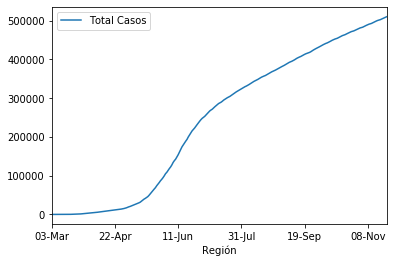

In [3]:
# Graficamos el dataset
dataset.plot(x ='Región', y='Total Casos')

In [4]:
# Convertimos la fecha alfanumeria a numerica
from datetime import datetime

FMT = '%d-%b-%Y'
dates = dataset['Región']
dataset['Dia'] = dates.map(lambda x : (datetime.strptime(x + '-2020', FMT) - datetime(2019, 12, 31)).days)
# Mostramos el dataset final
dataset

,Región,Total,Total Casos,Dia
0,03-Mar,0.0,0.0,63
1,04-Mar,2.0,2.0,64
2,05-Mar,1.0,3.0,65
3,06-Mar,1.0,4.0,66
4,07-Mar,2.0,6.0,67
5,08-Mar,3.0,9.0,68
6,09-Mar,5.0,14.0,69
7,10-Mar,2.0,16.0,70
8,11-Mar,6.0,22.0,71
9,12-Mar,10.0,32.0,72


### MODELO LINEAL

In [5]:
# importamos la libreria
from sklearn import linear_model

In [6]:
x = list(dataset['Dia']) # Fecha
y = list(dataset['Total Casos']) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: ', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: ', regr.intercept_)

Coefficients:  [2337.26823025]
Independent term:  -213190.70217243346


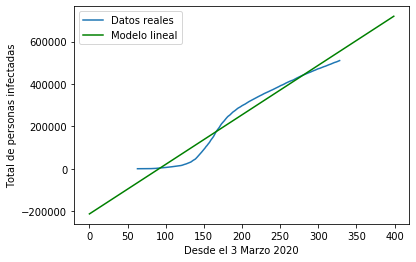

In [56]:
# Graficamos la funcion
plt.rc('font', size=10)
plt.plot(x, y, label="Datos reales")
x_real = np.array(range(0, 400))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green', label="Modelo lineal")
plt.legend()
plt.xlabel("Desde el 3 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.show()

In [57]:
# Predecimos total infectados dentro de 7 dias
preducion_lineal = regr.predict([[334]])
print("El número de infectados el 30 de noviembre del 2020 será: ", int(preducion_lineal))

El número de infectados el 30 de noviembre del 2020 será:  567456


### MODELO EXPONENCIAL

In [9]:
# importamos la libreria
from scipy.optimize import curve_fit

In [29]:
# Implementamos la funcion exponencial
x1 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y1 = np.array(y, dtype=float)

def modelo_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return a * np.exp(b * x) 

popt1, pcov1 = curve_fit(modelo_exponencial, x1, y1, p0=(0,0.1))
popt1

array([4.23703263e+04, 8.18255959e-03])

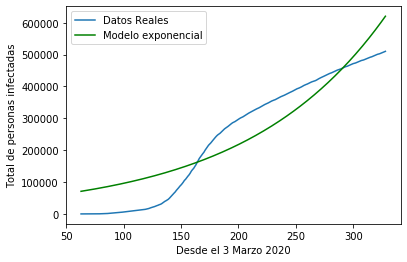

In [30]:
# Grfica del modelo exponencial
plt.rc('font', size=10)
plt.plot(x1, y1, label="Datos Reales")
plt.plot(x1, modelo_exponencial(x1, *popt1), color='green', label="Modelo exponencial")
plt.legend()
plt.xlabel("Desde el 3 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.show()

In [58]:
# Predecimos total infectados dentro de 7 dias
preducion_exponencial = modelo_exponencial(334, *popt1)
print("El número de infectados el 30 de noviembre del 2020 será: ", int(preducion_exponencial))

El número de infectados el 30 de noviembre del 2020 será:  651594


### MODELO POLINOMICO

In [32]:
# Implementamos la funcion polinomica
x2 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y2 = np.array(y, dtype=float)

def modelo_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt2, pcov2 = curve_fit(modelo_polinomial, x2, y2)
popt2

array([ 6.91946725e-04, -6.15648932e-01,  1.90687173e+02, -2.15205480e+04,
        7.78039605e+05])

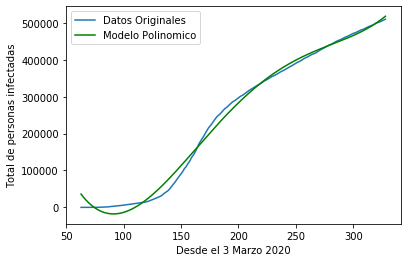

In [52]:
# Grfica del modelo polinomica
plt.rc('font', size=10)
plt.plot(x2, y2, label="Datos Originales")
plt.plot(x2, modelo_polinomial(x2, *popt2), label="Modelo Polinomico", color = 'green')
plt.legend()
plt.xlabel("Desde el 3 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.show()

In [59]:
# Predecimos total infectados dentro de 7 dias
preducion_polinomica = modelo_polinomial(334, *popt2)
print("El número de infectados el 30 de noviembre del 2020 será: ", int(preducion_polinomica))

El número de infectados el 30 de noviembre del 2020 será:  534675


### MODELO LOGISTICO

In [35]:
# Agreamos la funcion logistica
x3 = np.array(x, dtype=float) # transformo mi array de datos a floats 
y3 = np.array(y, dtype=float)

def modelo_logistico(x, a, b):
    return a + b * np.log(x)

popt3, pcov2 = curve_fit(modelo_logistico, x3, y3) # Extraemos los valores de los paramatros
popt2

array([ 6.91946725e-04, -6.15648932e-01,  1.90687173e+02, -2.15205480e+04,
        7.78039605e+05])

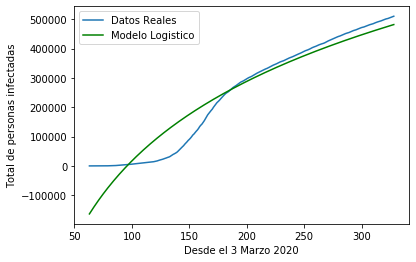

In [55]:
# Grfica del modelo logistico
plt.rc('font', size=10)
plt.plot(x3, y3, label="Datos Reales")
plt.plot(x3, modelo_logistico(x3, *popt3), label="Modelo Logistico", color="green")
plt.legend()
plt.xlabel("Desde el 3 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.show()

In [60]:
# Predecimos total infectados dentro de 7 dias
preducion_logistica = modelo_logistico(334, *popt3) 
print("El número de infectados el 30 de noviembre del 2020 será: ", int(preducion_logistica))

El número de infectados el 30 de noviembre del 2020 será:  488948


### MODELO PROBABILISTICO

In [24]:
# Obtenemos los nevos casos
filtro = dataset["Total"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print("MEDIA: ", media)
print("MEDIANA: ", mediana)

MEDIA:  1918.2142857142858
MEDIANA:  1665.5


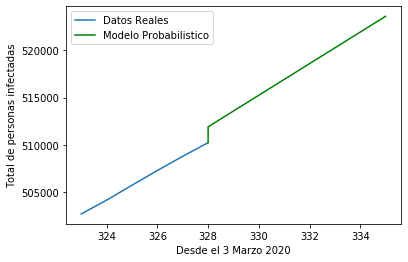

In [50]:
# Graficamos la funcion con 7 dias
x4, y4 = [x[-1]], [y[-1]]
for i in range(x[-1], x[-1] + 8):
    x4.append(i)
    y4.append(int(y4[-1] + mediana))
plt.plot(x[260:], y[260:], label="Datos Reales")
plt.plot(x4, y4, label="Modelo Probabilistico", color="green")
plt.legend()
plt.xlabel("Desde el 3 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.show()

In [61]:
# Predecimos total infectados dentro de 7 dias
preducion_probabilistica = int(y4[-1] + mediana)
print("El número de infectados el 30 de noviembre del 2020 será: ", int(preducion_probabilistica))

El número de infectados el 30 de noviembre del 2020 será:  525230


### COMPARACION DE LOS MODELOS

In [62]:
# matriz de resultados
data = [[preducion_lineal, preducion_exponencial, preducion_polinomica, preducion_logistica, preducion_probabilistica]] 
  
# Create the pandas DataFrame 
resultados = pd.DataFrame(data, columns = ['Lineal', 'Exponencial', 'Polinomico', 'Logistico', 'Probabilistico']) 
resultados

,Lineal,Exponencial,Polinomico,Logistico,Probabilistico
0,[567456.8867322004],651594.977136,534675.717319,488948.629653,525230


Como podemos observar en la tabla de resultados de predicciones de los modelos, concluimos que el modelo polinomico y probabilistico mantienen resultados muy aproximados a los datos actuales por lo que los consideramos los mas acertados en prediccion, sin embargo no decimos que sean los mas funcionales todo va a depender del conjunto de datos que tengamos.

* <strong> Ventajas y Desventajas </strong> <br>
    * Lineal <br>
    <strong>Ventajas</strong> Facil de entender y explicar, lo que es una ventaja al momento de exponer frente a un publico, Es     rapido de modelar y la prediccion mejora con datos Historicos. <br>
    <strong>Desventajas</strong> No se puede modelar relaciones complejas, ecuaciones de n grados.<br>
    * Logistico <br>
    <strong>Ventajas</strong> Es muy eficaz y simple Los resultados son faciles de interpretar No se necesita de muchos recurosos La prediccion mejora con datos Historicos.<br>
    <strong>Desventajas</strong> No puede resolver directamente problemas no lineales La dependecia de las carateristicas es un proble es al tener datos historios que dependan uno del otro, el modelo no podra definir otros datos que no cumplan con esta dependecia de datos y por lo tanto fallara. <br>
    * Polinomia <br>
    <strong>Ventajas</strong> Se ajusta mejor a la curva al ser una ecuacion de grado n Modela curvas sin tener que modelar modelos complicados.<br>
    <strong>Desventajas</strong> El grado de precision depende del grado entre mayor sea el grado mas se ajusta a la curva pero al ser el grado mayo los datos se esparcen mas y tienden a fallar.<br>
    * Exponencial<br>
    <strong>Ventajas</strong> Al ser una ecuacion exponencial se generara una curva y esta curva servira para ajustarse a los datos reales y asi realizar una mejor predicion. <br>
    <strong>Desventajas</strong> Dependera mucho el grado de precion de como se genere dicha ecuacion exponencial, cuales son susa variables de

    A=poblacion Inicial
    r=tasa de crecimiento
    t=unidades de tiempo f(t)=A.r.exp(t)
    Tambien la respuesta a la tendencia es problema ya que si day datos historicos que tenga una gran tendecia al tener otro valor que no cumpla con esta tendencia la predcion sera mas eronea<br>

* <strong> Principal problema del modelo probabilistico </strong><br>
El problema pincipal es que elmodelo predice de forma 'adecuada' cuando los valores del dataset son pequeños pero al momento de tener valores grandes en este conjunto de datos, su prediccion se vuelve totalmente erronea.
